In [57]:
import tensorflow as tf
# from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [58]:
img_size = (224, 224)
batch_size = 32

In [59]:
train_dir = "Covid19-dataset/train"
test_dir = "Covid19-dataset/test"

In [60]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes : " , class_names)

Found 251 files belonging to 3 classes.
Classes :  ['Covid', 'Normal', 'Viral Pneumonia']


In [61]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

class_names = test_ds.class_names
print("Classes : " , class_names)

Found 66 files belonging to 3 classes.
Classes :  ['Covid', 'Normal', 'Viral Pneumonia']


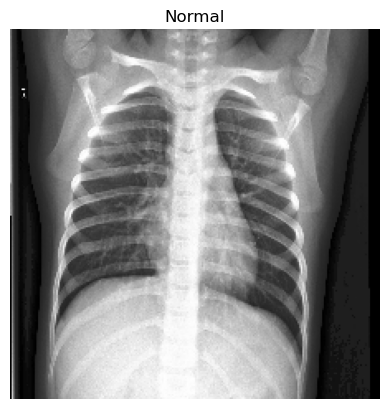

In [62]:
for images, labels in train_ds.take(1):
    plt.imshow(images[0].numpy().astype("uint8"))   # first image
    plt.title(class_names[labels[3]])
    plt.axis("off")
    plt.show()

In [63]:
class_names = train_ds.class_names

In [64]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')   # 3 classes: Covid, Normal, Viral Pneumonia
])

In [66]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.3780 - loss: 2.3148 - val_accuracy: 0.5303 - val_loss: 0.9507
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7356 - loss: 0.7854 - val_accuracy: 0.7121 - val_loss: 0.5576
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7970 - loss: 0.5234 - val_accuracy: 0.6818 - val_loss: 0.8135
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8478 - loss: 0.5207 - val_accuracy: 0.8636 - val_loss: 0.4023
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8961 - loss: 0.2740 - val_accuracy: 0.8939 - val_loss: 0.3405
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9474 - loss: 0.1553 - val_accuracy: 0.8636 - val_loss: 0.2919
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9780 - loss: 0.0838 - val_accuracy: 0.8939 - val_loss: 0.3029
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9535 - loss: 0.1082 - val_accuracy: 0.8485 - val_loss: 0.3188
Epoch 9/

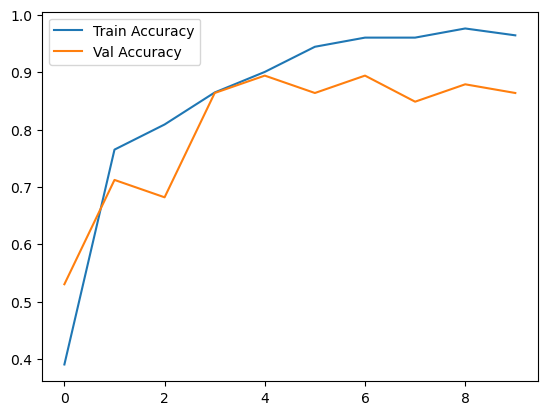

In [68]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [69]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.8732 - loss: 0.3268
Test Accuracy: 86.36%


In [54]:
import numpy as np

In [24]:
def predict_xray(model, img_path, class_names, img_size=(224,224)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0]) * 100
    
    plt.imshow(img)
    plt.title(f"Prediction: {class_names[predicted_class]} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()
    
    return class_names[predicted_class], confidence

In [25]:
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

In [80]:
img_path = "Covid19-dataset/test/Covid/0111.jpg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


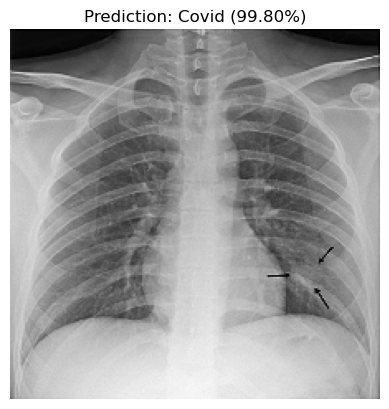

Predicted: Covid (99.80%)


In [81]:
label, conf = predict_xray(model, img_path, class_names)
print(f"Predicted: {label} ({conf:.2f}%)")

In [82]:
img_path_2 = "Covid19-dataset/test/Normal/0109.jpeg"
img_path_3 = "Covid19-dataset/test/Covid/0120.jpg"
img_path_4 = "Covid19-dataset/test/Viral Pneumonia/0111.jpeg"
img_path_5 = "Covid19-dataset/test/Covid/0102.jpeg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


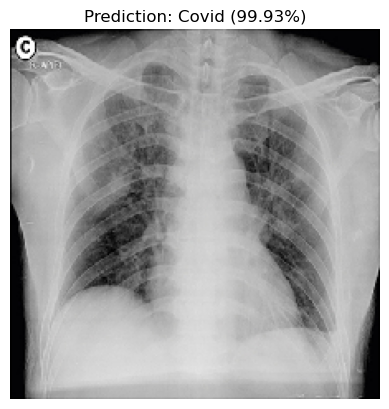

Predicted: Covid (99.93%)


In [83]:
label, conf = predict_xray(model, img_path_3, class_names)
print(f"Predicted: {label} ({conf:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


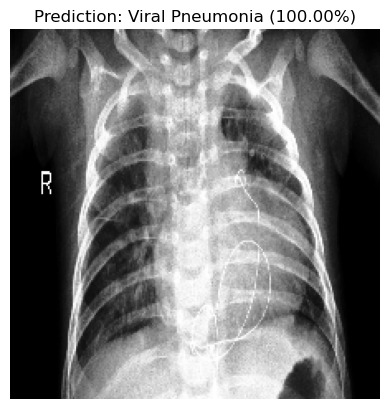

Predicted: Viral Pneumonia (100.00%)


In [84]:
label, conf = predict_xray(model, img_path_4, class_names)
print(f"Predicted: {label} ({conf:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


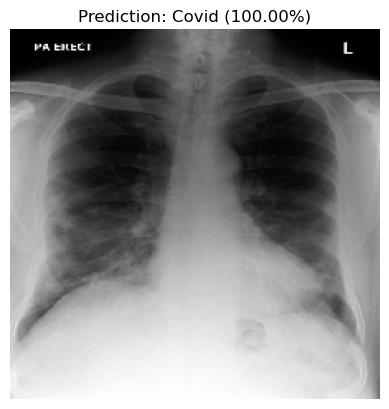

Predicted: Covid (100.00%)


In [85]:
label, conf = predict_xray(model, img_path_5, class_names)
print(f"Predicted: {label} ({conf:.2f}%)")